In [8]:
import os
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# --------------------------------- This is to plot violation rates over time------------------
""" Description:
#     This function visualizes the violation rates over a specified time range based on datasets 
#     stored in pickled files. Specifically, it calculates and plots the percentage of data rows that 
#     meet validation criteria ('validate' and 'validate_tol') on a daily basis.

 Parameters:
#     - start_date (datetime): The starting date of the time range to consider.
#     - end_date (datetime): The ending date of the time range to consider.
#     - dataset_name (str, optional): The base name of the dataset file. Defaults to '2021_whole_year.csv'.
#     - vol (int, optional): The volatility setting used in file naming. Defaults to 50.
#     - cp_flag (str, optional): The Call/Put indicator used in file naming. Defaults to 'C'.
#     - am_flag (int, optional): The American/European option indicator used in file naming. Defaults to 1.

# Returns:
#     None. The function plots the validation rates over the specified time range.

# Usage:
#     violation_overtime(datetime(2021, 1, 1), datetime(2021, 12, 31))

# Note:
#     Ensure the required pickled files, corresponding to the date range and naming conventions, 
#     exist in the current directory or update the directory variable accordingly.
"""

def violation_overtime(start_date, end_date, dataset_name = '2021_whole_year.csv', vol=50, cp_flag = 'C', am_flag = 1):

    # Directory where files are located
    year = dataset_name[:4]
    directory = './2021_Filtering_condition_3'

    valid_rates = []
    valid_tol_rates = []
    dates = []
    rows = []

    # Loop through dates
    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        file_name = f"{date_str}FC3_indexed_{cp_flag}_am={str(am_flag)}_vol{str(vol)}_{dataset_name}.pkl"
        full_path = os.path.join(directory, file_name)

        # Check if the file exists and process it
        if os.path.exists(full_path):
            dates.append(date_str)
            with open(full_path, 'rb') as f:
                df = pickle.load(f)
                rows.append(len(df))
                # Calculate the number of rows where both validate and validate_tol are 1
                valid_rows = df[df['validate'] == 1].shape[0]
                valid_tol_rows = df[df['validate_tol'] == 1].shape[0]

                # Calculate the total number of rows
                total_rows = df.shape[0]
#                 print(valid_rows, valid_tol_rows, total_rows)
                # Calculate the percentage
                percentage_valid = (valid_rows / total_rows) * 100
                percentage_valid_tol = (valid_tol_rows / total_rows) * 100
                valid_rates.append(percentage_valid)
                valid_tol_rates.append(percentage_valid_tol)
        # Move to the next day
        current_date += timedelta(days=1)
    # Plotting
    plt.figure(figsize=(15, 7))
    plt.plot(dates, valid_rates, marker='o', label='Validate Rate')
    plt.plot(dates, valid_tol_rates, marker='o', label='Validate Tolerance Rate')
#     plt.plot(dates, rows, marker='o', label='number of rows')
    plt.xlabel('Date')
    plt.ylabel('Validation Rate (%)')
    plt.title(f'Validation Rates {str(start_date)[:10]}FC3 to {str(end_date)[:10]} with {cp_flag}_am ={str(am_flag)}_vol{str(vol)}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
#     -------------------- PLOT NUMBER OF ROWS
    plt.figure(figsize=(15, 7))
    plt.plot(dates, rows, marker='o', label='number of rows')
    plt.xlabel('Date')
    plt.ylabel('Number of 4-tuples(rows) (%)')
    plt.title(f'Number of rows {str(start_date)[:10]}FC3 to {str(end_date)[:10]} with {cp_flag}_am ={str(am_flag)}_vol{str(vol)}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    return (dates, valid_rates, valid_tol_rates, rows)


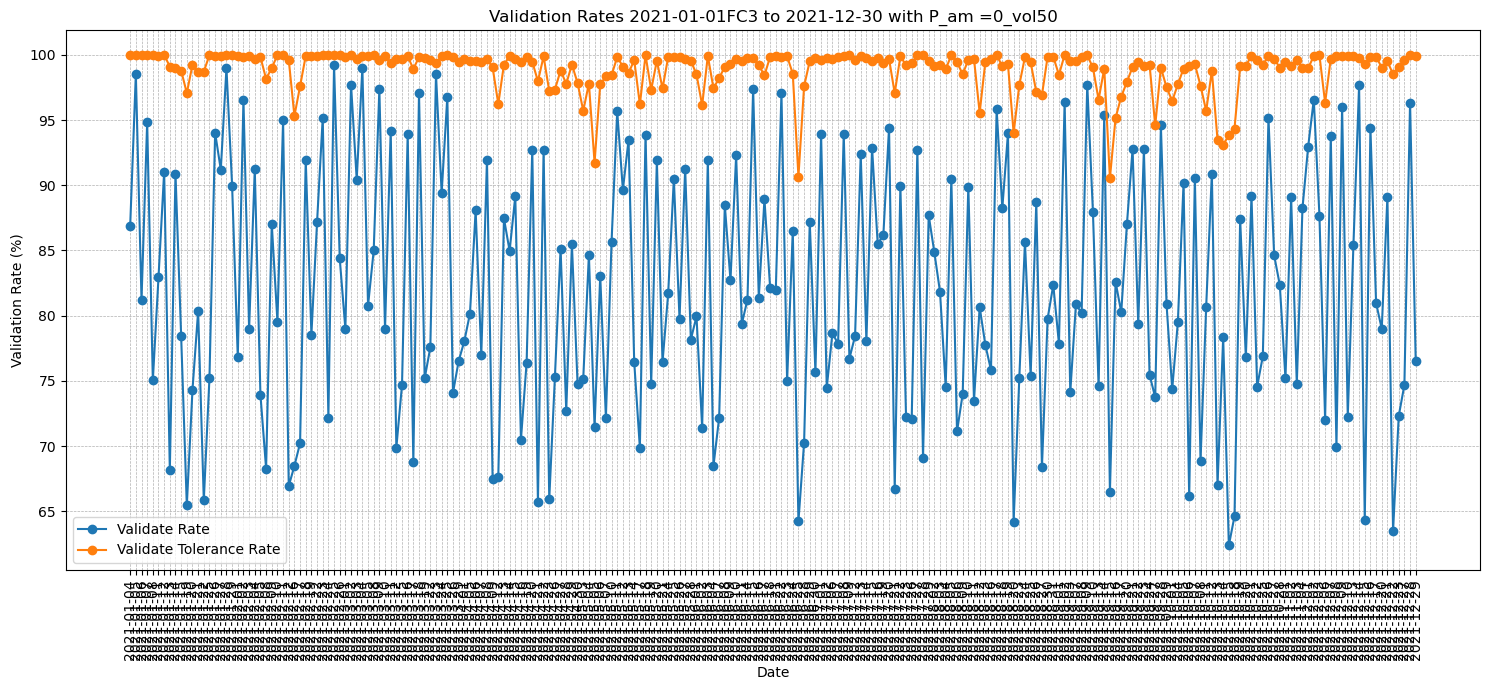

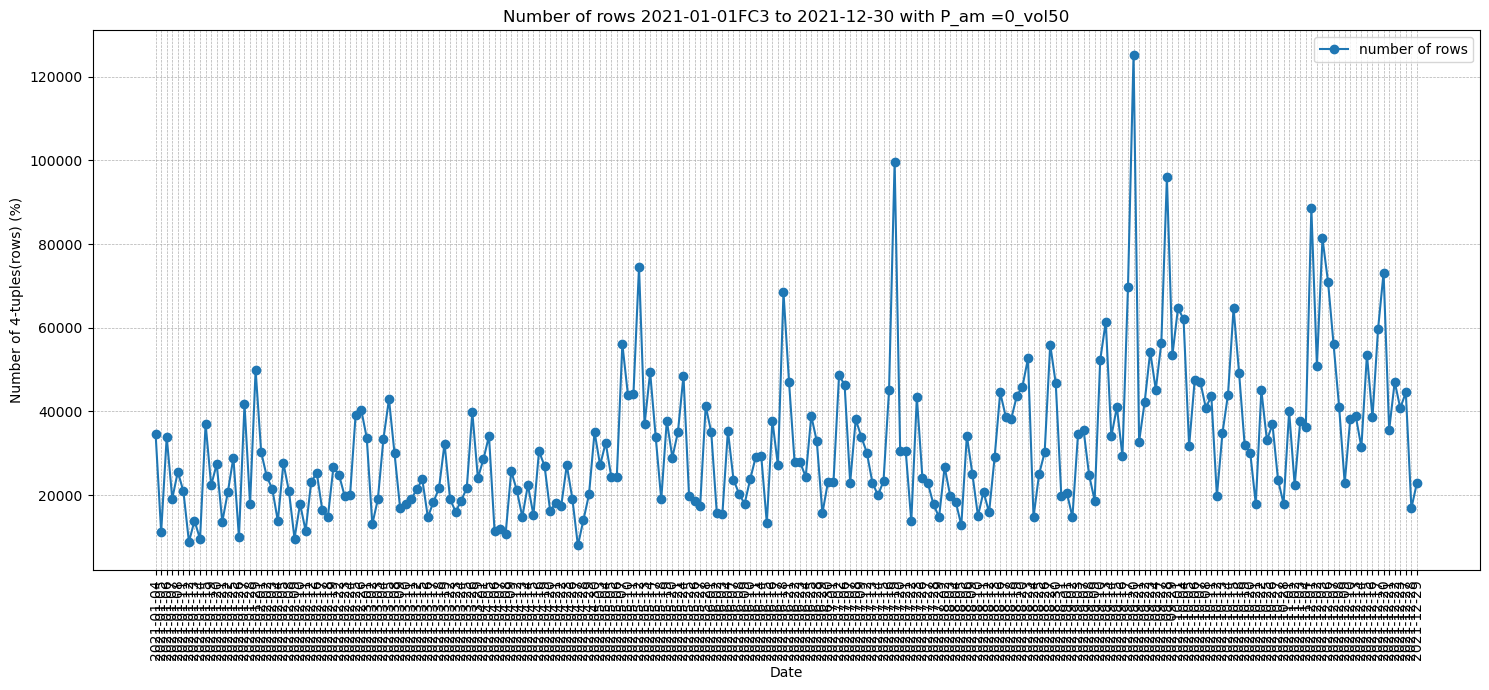

In [22]:
(dates, valid_rates, valid_tol_rates, rows) = violation_overtime(start_date=datetime(2021, 1, 1), end_date=datetime(2021, 12, 30), dataset_name = '2021_with_forward_price.pkl', vol=50, cp_flag = 'P', am_flag = 0)


In [23]:
# Write the results to a CSV file

import pandas as pd   
import csv

header = ['Date', 'Validate Rate', 'Validate Tolerance Rate', 'Number of 4-tuple pairs']
data = [header] + list(zip(dates, valid_rates, valid_tol_rates, rows))

with open('./violation_rate_csv_files/2021_PUT_PM.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)
